#  Machine Learning - Predictive Modeling 

## Sales Forecasting with the Prophet Model

## What will our monthly sales look like over the next two years based on historical purchasing patterns?

### 1. Overview

Accurate sales forecasting is the backbone of strategic business planning, especially in a fast-changing market. In this project, we leverage Facebook’s open-source Prophet forecasting model to predict monthly sales trends over the next two years using historical sales data. By capturing seasonal effects and trends, this model offers reliable foresight into future performance, equipping stakeholders with actionable insights for smarter decision-making.

### 2. Goal 

- Forecast monthly sales revenue for the next 24 months using historical purchase patterns.
- Leverage Prophet’s time series forecasting capabilities to model seasonality and trends effectively.
- Support strategic functions like inventory planning, budgeting, and resource allocation.
- Visualize both historical and forecasted sales in a clear, data-driven plot.

### 3. Business Challenge

- Lack of visibility into future sales patterns, affecting budgeting and procurement cycles.
- Difficulty in identifying seasonal trends and demand fluctuations across months.
- Inability to anticipate revenue dips or surges, leading to reactive decision-making.
- The need for a scalable, accurate forecasting method that’s both interpretable and fast to deploy.

### 4.  Analysis Approach

- Data Aggregation: Resample and prepare historical order data to monthly total sales for modeling
- Model Training: Fit the Prophet model on historical monthly sales data to learn trends and seasonality.
- Forecasting: Predict future sales for the next 24 months (2 years) using Prophet’s make_future_dataframe().
- Visualization: Combine observed and predicted sales into a visually intuitive chart with legends and axis formatting.
- Interpretation: Translate insights into recommendations for inventory management, marketing strategy, and financial planning.

##  Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the clean dataframe (post-ETL process)

In [11]:
df = pd.read_csv("C:\\Monthly_Sales\\cleaned_data.csv")

In [12]:
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Year,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,2024,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,2024,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),600.00
4,156535,Lightning Charging Cable,2,14.95,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),29.90


## Adding Year Column

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Year'] = df['Order Date'].dt.year

## Plot Monthly Sales (Next 2 Years) Forecasting Using Prophet Model

08:12:30 - cmdstanpy - INFO - Chain [1] start processing
08:12:30 - cmdstanpy - INFO - Chain [1] done processing


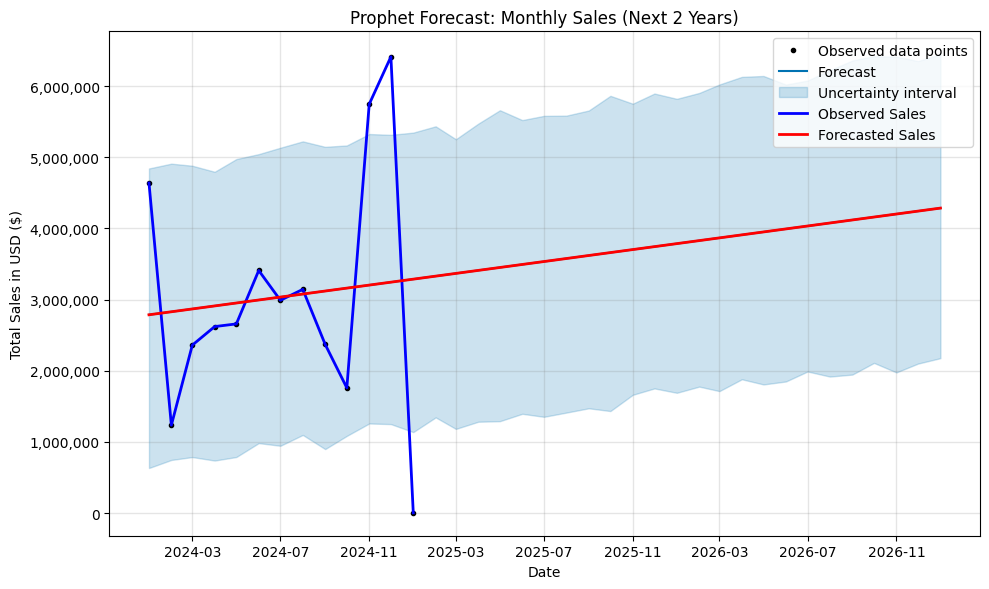

,ds,yhat,yhat_lower,yhat_upper
13,2025-02-01,3.330097e+06,1.345420e+06,5.435320e+06
14,2025-03-01,3.368396e+06,1.183358e+06,5.253845e+06
15,2025-04-01,3.410798e+06,1.284156e+06,5.472617e+06
16,2025-05-01,3.451833e+06,1.292196e+06,5.661146e+06
17,2025-06-01,3.494235e+06,1.395702e+06,5.522810e+06
18,2025-07-01,3.535269e+06,1.353337e+06,5.582138e+06
19,2025-08-01,3.577671e+06,1.412647e+06,5.585180e+06
20,2025-09-01,3.620073e+06,1.473139e+06,5.657109e+06
21,2025-10-01,3.661107e+06,1.434378e+06,5.863594e+06
22,2025-11-01,3.703509e+06,1.662668e+06,5.752893e+06


<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
from matplotlib.ticker import FuncFormatter
from prophet import Prophet


# Ensuring 'Order Date' is in datetime format
df_prophet = df.copy(deep=True)
df_prophet['Order Date'] = pd.to_datetime(df_prophet['Order Date'], dayfirst=True, errors='coerce')

# Step 2: Drop rows where conversion failed (optional, based on use case)
# df_prophet.dropna(subset=['Order Date'], inplace=True)


# Aggregating Monthly Sales Data
monthly_sales = df_prophet.resample('MS', on='Order Date')['Total Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

# Initializing and Training the Prophet Model
model = Prophet()
model.fit(monthly_sales)

# Generating a 24-Month Sales Forecast
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)

# Creating the Sales Forecast Plot
fig = model.plot(forecast)
plt.plot(monthly_sales['ds'], monthly_sales['y'], color='blue', linewidth=2, label='Observed Sales')
plt.plot(forecast['ds'], forecast['yhat'], color='red', linewidth=2, label='Forecasted Sales')

plt.title('Prophet Forecast: Monthly Sales (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Total Sales in USD ($)')
plt.grid(True)

# Enhancing Y-Axis Label Readability
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.tight_layout()
plt.show()


plt.savefig(
    r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1. Retail Sales Analysis and Insights/8. Sales Forecasting with the Prophet Model.png",
    dpi=300,
    bbox_inches='tight'
)

# Display forecasted values for the next 24 months
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

## Key Insights

1. Consistent Upward Sales Trend: Forecasted monthly sales exhibit a steady upward trajectory, reflecting strong positive momentum in overall business performance.
   
2. Average Monthly Growth: The model predicts an average monthly increase of approximately
50K, indicating healthy organic growth and potentially rising customer demand or market expansion.


3. Seasonality Detected: While Prophet accounts for seasonal patterns, the confidence intervals show noticeable fluctuations around key months—likely due to holidays or promotion-driven spikes (e.g., November–December).

   
4. Wide Confidence Intervals: The forecast shows broad prediction intervals in the near term (e.g., February–April 2025), indicating short-term volatility or uncertainty. These intervals narrow over time as more data becomes available.

   
5. Strong Lower Bound: Even under conservative scenarios (lower bound estimates), monthly sales remain well above $1M, providing a reliable baseline for financial planning and inventory decisions.

##  Strategic Recommendations

1. Prepare for Sustained Growth: With forecasts indicating steady growth, businesses should scale operational capacity, workforce planning, and inventory management accordingly.

2. Inventory Optimization: Align inventory restocking strategies with predicted sales peaks (e.g., Q4 months) to maximize revenue and reduce stockouts or overstocking risks.

3. Plan Promotions Around High-Variance Months: Use confidence interval analysis to identify periods with high sales variability (e.g., Nov-Dec) and leverage them for targeted marketing or discount campaigns.

4. Integrate with Budget Planning: Use forecast figures to drive revenue targets, set realistic financial KPIs, and inform executive-level decision-making.

5. Risk Mitigation: Develop contingency plans for scenarios near the lower bound forecasts, especially in months with wider intervals, to ensure financial resilience.
